# Automobile Price Prediction Project using Python

# Exploratory Data Analysis
Here in this project ,I intend to prepare a model to determine the price of a car.
In our dataset, we have some cars data ,dataset includes the features of car and the price at which car was sold off.
from this dataset ,we intend to prepare a model so that we can predict the price of some newly added cars in our dataset accurately.

firstly, we would understand the dataset,and determine the features which determines the price of the car
then, we would try to find the correct model type
and at last ,we would prepare the model ,prepare a training and testing data set
to predict the price of car for new dataset



<h2>Table of Contents</h2>

<div class="alert alert-block alert-info" style="margin-top: 20px">
<ol>
    <li>Import Data from Module</li>
    <li>Analyzing Individual Feature Patterns using Visualization</li>
    <li>Descriptive Statistical Analysis</li>
    <li>Basics of Grouping</li>
    <li>Correlation and Causation</li>
    <li>ANOVA</li>
</ol>

</div>

<hr>


## 1. Data Preparation and Analysis


<h3>What are the main characteristics that have the most impact on the car price?</h3>


<h2> 1.1 Import Cleaned Data from csv file</h2>


Import libraries:


In [1]:
import pandas as pd
import numpy as np
import scipy

Load the data and store it in dataframe `df`:


In [2]:
filename = r"D:\gaurav_data_analyst\Car_Price_Model\car_data_cleaned.csv"
df = pd.read_csv(filename)
pd.set_option('display.max_columns',None)
df.head()

,symboling,normalized-losses,make,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,length,width,height,curb-weight,engine-type,num-of-cylinders,engine-size,fuel-system,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price,city-L/100km,highway-L/100km,horsepower-binned,fuel-type-diesel,fuel-type-gas,aspiration-std,aspiration-turbo
0,3,122,alfa-romero,two,convertible,rwd,front,88.6,0.811148,0.890278,0.014888,2548,dohc,four,130,mpfi,3.47,2.68,9.0,111,5000.0,21,27,13495.0,11.190476,8.703704,Low,0,1,1,0
1,3,122,alfa-romero,two,convertible,rwd,front,88.6,0.811148,0.890278,0.014888,2548,dohc,four,130,mpfi,3.47,2.68,9.0,111,5000.0,21,27,16500.0,11.190476,8.703704,Low,0,1,1,0
2,1,122,alfa-romero,two,hatchback,rwd,front,94.5,0.822681,0.909722,0.015213,2823,ohcv,six,152,mpfi,2.68,3.47,9.0,154,5000.0,19,26,16500.0,12.368421,9.038462,Medium,0,1,1,0
3,2,164,audi,four,sedan,fwd,front,99.8,0.848630,0.919444,0.015375,2337,ohc,four,109,mpfi,3.19,3.40,10.0,102,5500.0,24,30,13950.0,9.791667,7.833333,Low,0,1,1,0
4,2,164,audi,four,sedan,4wd,front,99.4,0.848630,0.922222,0.015422,2824,ohc,five,136,mpfi,3.19,3.40,8.0,115,5500.0,18,22,17450.0,13.055556,10.681818,Low,0,1,1,0


In [3]:
# list the data types for each column
print(df.dtypes)

symboling              int64
normalized-losses      int64
make                  object
num-of-doors          object
body-style            object
drive-wheels          object
engine-location       object
wheel-base           float64
length               float64
width                float64
height               float64
curb-weight            int64
engine-type           object
num-of-cylinders      object
engine-size            int64
fuel-system           object
bore                 float64
stroke               float64
compression-ratio    float64
horsepower             int64
peak-rpm             float64
city-mpg               int64
highway-mpg            int64
price                float64
city-L/100km         float64
highway-L/100km      float64
horsepower-binned     object
fuel-type-diesel       int64
fuel-type-gas          int64
aspiration-std         int64
aspiration-turbo       int64
dtype: object


we can calculate the correlation between variables  of type "int64" or "float64" using the method "corr":


In [4]:
df.corr()

,symboling,normalized-losses,wheel-base,length,width,height,curb-weight,engine-size,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price,city-L/100km,highway-L/100km,fuel-type-diesel,fuel-type-gas,aspiration-std,aspiration-turbo
symboling,1.000000,0.466264,-0.535987,-0.365404,-0.242423,-0.242423,-0.233118,-0.110581,-0.140019,-0.008153,-0.182196,0.075810,0.279740,-0.035527,0.036233,-0.082391,0.066171,-0.029807,-0.196735,0.196735,0.054615,-0.054615
normalized-losses,0.466264,1.000000,-0.056661,0.019424,0.086802,0.086802,0.099404,0.112360,-0.029862,0.055045,-0.114713,0.217300,0.239543,-0.225016,-0.181877,0.133999,0.238567,0.181189,-0.101546,0.101546,0.006911,-0.006911
wheel-base,-0.535987,-0.056661,1.000000,0.876024,0.814507,0.814507,0.782097,0.572027,0.493244,0.158018,0.250313,0.371178,-0.360305,-0.470606,-0.543304,0.584642,0.476153,0.577576,0.307237,-0.307237,-0.256889,0.256889
length,-0.365404,0.019424,0.876024,1.000000,0.857170,0.857170,0.880665,0.685025,0.608971,0.123952,0.159733,0.579795,-0.285970,-0.665192,-0.698142,0.690628,0.657373,0.707108,0.211187,-0.211187,-0.230085,0.230085
width,-0.242423,0.086802,0.814507,0.857170,1.000000,1.000000,0.866201,0.729436,0.544885,0.188822,0.189867,0.615056,-0.245800,-0.633531,-0.680635,0.751265,0.673363,0.736728,0.244356,-0.244356,-0.305732,0.305732
height,-0.242423,0.086802,0.814507,0.857170,1.000000,1.000000,0.866201,0.729436,0.544885,0.188822,0.189867,0.615056,-0.245800,-0.633531,-0.680635,0.751265,0.673363,0.736728,0.244356,-0.244356,-0.305732,0.305732
curb-weight,-0.233118,0.099404,0.782097,0.880665,0.866201,0.866201,1.000000,0.849072,0.644060,0.167438,0.156433,0.757981,-0.279361,-0.749543,-0.794889,0.834415,0.785353,0.836921,0.221046,-0.221046,-0.321955,0.321955
engine-size,-0.110581,0.112360,0.572027,0.685025,0.729436,0.729436,0.849072,1.000000,0.572609,0.205928,0.028889,0.822668,-0.256733,-0.650546,-0.679571,0.872335,0.745059,0.783465,0.070779,-0.070779,-0.110040,0.110040
bore,-0.140019,-0.029862,0.493244,0.608971,0.544885,0.544885,0.644060,0.572609,1.000000,-0.055390,0.001263,0.566903,-0.267392,-0.582027,-0.591309,0.543155,0.554610,0.559112,0.054458,-0.054458,-0.227816,0.227816
stroke,-0.008153,0.055045,0.158018,0.123952,0.188822,0.188822,0.167438,0.205928,-0.055390,1.000000,0.187871,0.098128,-0.063561,-0.033956,-0.034636,0.082269,0.036133,0.047089,0.241064,-0.241064,-0.218233,0.218233


<h2 id="pattern_visualization">1.2 Analyzing Individual Feature Patterns Using Visualization</h2>


In [5]:
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline 

<h2>Continuous Numerical Variables:</h2> 

<p>Continuous numerical variables are variables that may contain any value within some range. They can be of type "int64" or "float64". A great way to visualize these variables is by using regplots.</p>

Let's see several examples of different linear relationships:


<h3>Positive Linear Relationship</h4>


Let's find the scatterplot of "engine-size" and "price".


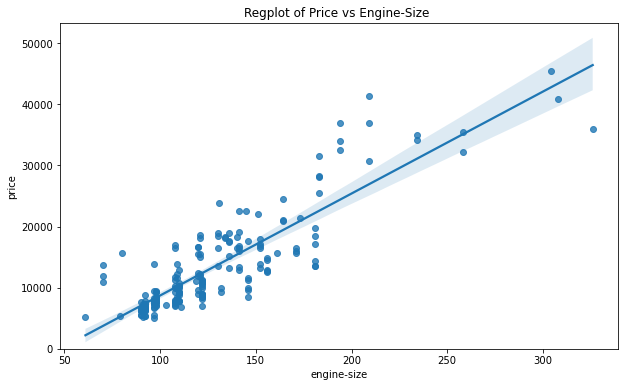

In [6]:
# Engine size as potential predictor variable of price
ax =plt.figure(figsize=(10,6))
sns.regplot(x="engine-size", y="price", data=df)
plt.ylim(0,)
plt.title("Regplot of Price vs Engine-Size ")
plt.show()


<p>As the engine-size goes up, the price goes up: this indicates a positive direct correlation between these two variables. Engine size seems like a pretty good predictor of price since the regression line is almost a perfect diagonal line.</p>


We can examine the correlation between 'engine-size' and 'price'.


In [7]:
df[["engine-size", "price"]].corr()

,engine-size,price
engine-size,1.000000,0.872335
price,0.872335,1.000000


Highway mpg might be a potential predictor variable of price. Let's find the scatterplot of "highway-mpg" and "price".


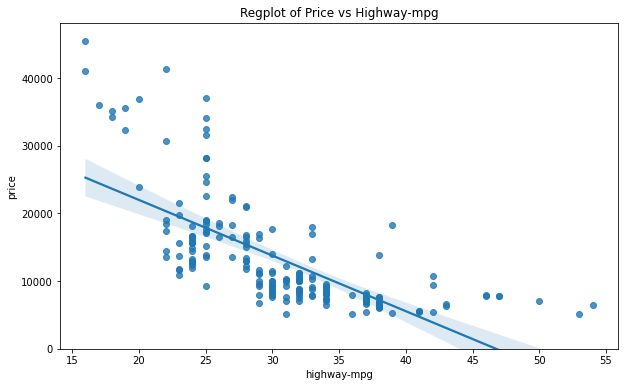

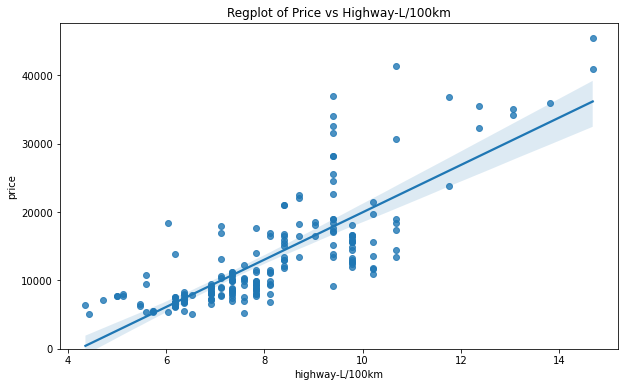

In [8]:
ax =plt.figure(figsize=(10,6))
sns.regplot(x="highway-mpg", y="price", data=df)
plt.ylim(0,)
plt.title("Regplot of Price vs Highway-mpg")
plt.show()
ax =plt.figure(figsize=(10,6))
sns.regplot(x="highway-L/100km", y="price", data=df)
plt.ylim(0,)
plt.title("Regplot of Price vs Highway-L/100km")
plt.show()


<p>As highway-mpg goes up, the price goes down: this indicates an inverse/negative relationship between these two variables. Highway mpg could potentially be a predictor of price.</p>
whereas highway-L/100km has a positive relationship

We can examine the correlation between 'highway-mpg' and 'price' and see it's approximately -0.704.


In [9]:
df[['highway-mpg','highway-L/100km', 'price']].corr()

,highway-mpg,highway-L/100km,price
highway-mpg,1.000000,-0.951100,-0.704692
highway-L/100km,-0.951100,1.000000,0.801118
price,-0.704692,0.801118,1.000000


<h3>Weak Linear Relationship</h3>


Let's see if "peak-rpm" is a predictor variable of "price".


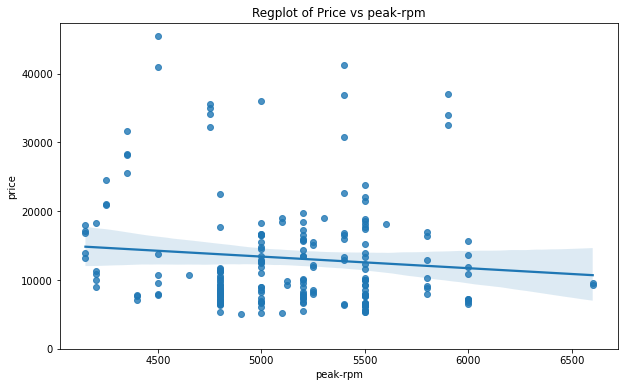

In [10]:
ax =plt.figure(figsize=(10,6))
sns.regplot(x="peak-rpm", y="price", data=df)
plt.ylim(0,)
plt.title("Regplot of Price vs peak-rpm")
plt.show()


<p>Peak rpm does not seem like a good predictor of the price at all since the regression line is close to horizontal. Also, the data points are very scattered and far from the fitted line, showing lots of variability. Therefore, it's not a reliable variable.</p>


We can examine the correlation between 'peak-rpm' and 'price' and see it's approximately -0.101616.


In [11]:
df[['peak-rpm','price']].corr()

,peak-rpm,price
peak-rpm,1.000000,-0.101616
price,-0.101616,1.000000


Let's see if stroke is a potential predictor of price.

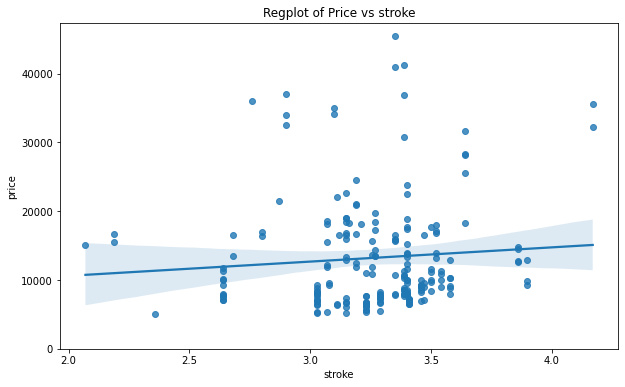

In [12]:
ax =plt.figure(figsize=(10,6))
sns.regplot(x="stroke",y="price",data = df)
plt.ylim(0,)
plt.title("Regplot of Price vs stroke")
plt.show()

In [13]:
# Write your code below and press Shift+Enter to execute
df[["stroke","price"]].corr()

,stroke,price
stroke,1.000000,0.082269
price,0.082269,1.000000


<p>stroke does not seem like a good predictor of the price at all since the regression line is close to horizontal. Also, the data points are very scattered and far from the fitted line, showing lots of variability. Therefore, it's not a reliable variable.</p>


<h3>Categorical Variables</h3>

<p>These are variables that describe a 'characteristic' of a data unit, and are selected from a small group of categories. The categorical variables can have the type "object" or "int64". A good way to visualize categorical variables is by using boxplots.</p>


Let's look at the relationship between "body-style" and "price".


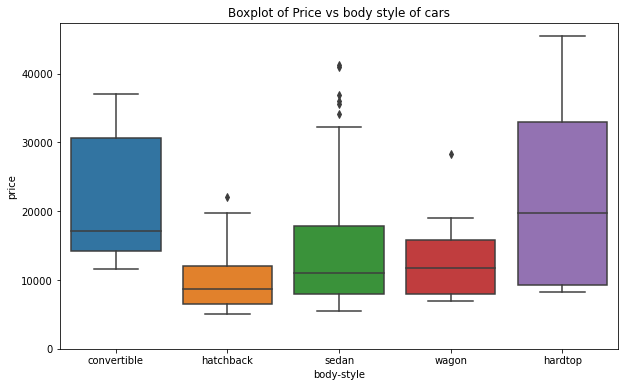

In [14]:
ax =plt.figure(figsize=(10,6))
sns.boxplot(x="body-style", y="price", data=df)
plt.ylim(0,)
plt.title("Boxplot of Price vs body style of cars")
plt.show()


<p>We see that the distributions of price between the different body-style categories have a significant overlap, so body-style would not be a good predictor of price. Let's examine engine "engine-location" and "price":</p>


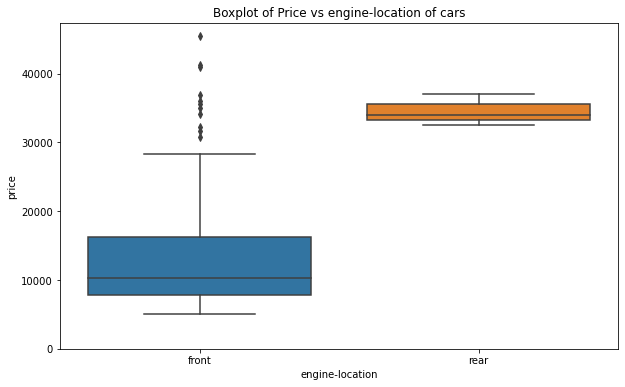

In [15]:
ax =plt.figure(figsize=(10,6))
sns.boxplot(x="engine-location", y="price", data=df)
plt.ylim(0,)
plt.title("Boxplot of Price vs engine-location of cars")
plt.show()


<p>Here we see that the distribution of price between these two engine-location categories, front and rear, are distinct enough to take engine-location as a potential good predictor of price.</p>
Eventhough there are some outliers in the front engine section box ,but still we can see the trend that the cars with engine location as rear tends to have higher price.

Let's examine "drive-wheels" and "price".


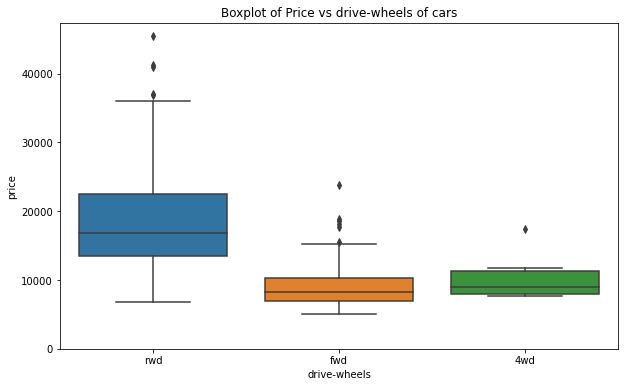

In [16]:
# drive-wheels
ax =plt.figure(figsize=(10,6))
sns.boxplot(x="drive-wheels", y="price", data=df)
plt.ylim(0,)
plt.title("Boxplot of Price vs drive-wheels of cars")
plt.show()


<p>Here we see that the distribution of price between the different drive-wheels categories differs. As such, drive-wheels could potentially be a predictor of price.</p>
also we can notice that cars with rear wheel drive system tends to have higher price as RWD is more balanced than FWD and others

<h2 id="discriptive_statistics">3. Descriptive Statistical Analysis</h2>


The default setting of "describe" skips variables of type object. We can apply the method "describe" on the variables of type 'object' as follows:


In [17]:
df.describe(include=['object'])

,make,num-of-doors,body-style,drive-wheels,engine-location,engine-type,num-of-cylinders,fuel-system,horsepower-binned
count,201,201,201,201,201,201,201,201,201
unique,22,2,5,3,2,6,7,8,3
top,toyota,four,sedan,fwd,front,ohc,four,mpfi,Low
freq,32,115,94,118,198,145,157,92,153


<h3>Value Counts</h3>


<p>Value counts is a good way of understanding how many units of each characteristic/variable we have,
Because even if boxplot helps in predicting the dependency,if the datas in boxes are not enough,it still isn't a good predictor.

In [18]:
drive_wheels_counts = df['drive-wheels'].value_counts().to_frame()
drive_wheels_counts.rename(columns={'drive-wheels': 'value_counts'}, inplace=True)
drive_wheels_counts.index.name = 'drive-wheels'
drive_wheels_counts

,value_counts
drive-wheels,
fwd,118
rwd,75
4wd,8


Here we can see that the rwd wheel drive system has good count of datas,So boxplot of wheel system was useful in determinig the predictor 

We can repeat the above process for the variable 'engine-location'.


In [19]:
# engine-location as variable
engine_loc_counts = df['engine-location'].value_counts().to_frame()
engine_loc_counts.rename(columns={'engine-location': 'value_counts'}, inplace=True)
engine_loc_counts.index.name = 'engine-location'
engine_loc_counts.head(10)

,value_counts
engine-location,
front,198
rear,3


<p>After examining the value counts of the engine location, we see that engine location would not be a good predictor variable for the price. This is because we only have three cars with a rear engine and 198 with an engine in the front, so this result is skewed. Thus, we are not able to draw any conclusions about the engine location.</p>

<h2 id="basic_grouping">4. Basics of Grouping</h2>


<p>The "groupby" method groups data by different categories. The data is grouped based on one or several variables, and analysis is performed on the individual groups.</p>

<p>For example, let's group by the variable "drive-wheels". We see that there are 3 different categories of drive wheels.</p>


<p>If we want to know, on average, which type of drive wheel is most valuable, we can group "drive-wheels" and then average them.</p>

In [29]:
df_group = df[['drive-wheels','body-style','price']]
# grouping results
df_group_one = df_group.groupby(['drive-wheels'],as_index=False).mean()
df_group_one

,drive-wheels,price
0,4wd,10241.000000
1,fwd,9244.779661
2,rwd,19757.613333


In [30]:
# grouping results
grouped_test1 = df_group.groupby(['drive-wheels','body-style'],as_index=False).mean()
grouped_pivot = grouped_test1.pivot(index='drive-wheels',columns='body-style')
grouped_pivot = grouped_pivot.fillna(0)
grouped_pivot

price                                            \
body-style   convertible       hardtop     hatchback         sedan   
drive-wheels                                                         
4wd                  0.0      0.000000   7603.000000  12647.333333   
fwd              11595.0   8249.000000   8396.387755   9811.800000   
rwd              23949.6  24202.714286  14337.777778  21711.833333   

                            
body-style           wagon  
drive-wheels                
4wd            9095.750000  
fwd            9997.333333  
rwd           16994.222222

<p>This grouped data is much easier to visualize when it is made into a pivot table.

<h4>Variables: Drive Wheels and Body Style vs. Price</h4>


Let's use a heat map to visualize the relationship between Body Style vs Price.


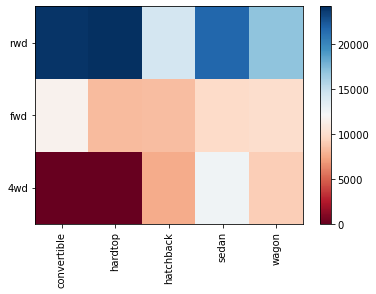

In [22]:
fig, ax = plt.subplots()
im = ax.pcolor(grouped_pivot, cmap='RdBu')

#label names
row_labels = grouped_pivot.columns.levels[1]
col_labels = grouped_pivot.index

#move ticks and labels to the center
ax.set_xticks(np.arange(grouped_pivot.shape[1]) + 0.5, minor=False)
ax.set_yticks(np.arange(grouped_pivot.shape[0]) + 0.5, minor=False)

#insert labels
ax.set_xticklabels(row_labels, minor=False)
ax.set_yticklabels(col_labels, minor=False)

#rotate label if too long
plt.xticks(rotation=90)

fig.colorbar(im)
plt.show()

<h2 id="correlation_causation">5. Correlation and Causation</h2>


<p><b>Correlation</b>: a measure of the extent of interdependence between variables.</p>

<p><b>Causation</b>: the relationship between cause and effect between two variables.</p>

<p>It is important to know the difference between these two. Correlation does not imply causation. Determining correlation is much simpler  the determining causation as causation may require independent experimentation.</p>


<p>Pearson Correlation is the default method of the function "corr". Like before, we can calculate the Pearson Correlation of the of the 'int64' or 'float64'  variables.</p>


<b>P-value</b>

<p>What is this P-value? The P-value is the probability value that the correlation between these two variables is statistically significant. Normally, we choose a significance level of 0.05, which means that we are 95% confident that the correlation between the variables is significant.</p>

By convention, when the

<ul>
    <li>p-value is $<$ 0.001: we say there is strong evidence that the correlation is significant.</li>
    <li>the p-value is $<$ 0.05: there is moderate evidence that the correlation is significant.</li>
    <li>the p-value is $<$ 0.1: there is weak evidence that the correlation is significant.</li>
    <li>the p-value is $>$ 0.1: there is no evidence that the correlation is significant.</li>
</ul>


We can obtain this information using  "stats" module in the "scipy"  library.


In [23]:
from scipy import stats

<h3>Wheel-Base vs. Price</h3>


Let's calculate the  Pearson Correlation Coefficient and P-value of 'wheel-base' and 'price'.


In [24]:
pearson_coef, p_value = stats.pearsonr(df['wheel-base'], df['price'])
print("The Pearson Correlation Coefficient is", pearson_coef, " with a P-value of P =", p_value)  

The Pearson Correlation Coefficient is 0.5846418222655083  with a P-value of P = 8.076488270732873e-20


<h4>Conclusion:</h4>
<p>Since the p-value is $<$ 0.001, the correlation between wheel-base and price is statistically significant, although the linear relationship isn't extremely strong (~0.585).</p>


Similarly, we will try to find the dependence of price on Horsepower ,Length ,Width ,Curb-Weight ,Engine-Size ,Bore,city-mpg and highway-mpg.

In [25]:
pearson_coef_1, p_value_1 = stats.pearsonr(df['horsepower'], df['price'])
pearson_coef_2, p_value_2 = stats.pearsonr(df['length'], df['price'])
pearson_coef_3, p_value_3 = stats.pearsonr(df['width'], df['price'])
pearson_coef_4, p_value_4 = stats.pearsonr(df['curb-weight'], df['price'])
pearson_coef_5, p_value_5 = stats.pearsonr(df['engine-size'], df['price'])
pearson_coef_6, p_value_6 = stats.pearsonr(df['bore'], df['price'])
pearson_coef_7, p_value_7 = stats.pearsonr(df['city-mpg'], df['price'])
pearson_coef_8, p_value_8 = stats.pearsonr(df['highway-mpg'], df['price'])

print("The Pearson Correlation Coefficient of Horsepower is", pearson_coef_1, " with a P-value of P = ", p_value_1) 
print("The Pearson Correlation Coefficient of length is", pearson_coef_2, " with a P-value of P = ", p_value_2)
print("The Pearson Correlation Coefficient of width is", pearson_coef_3, " with a P-value of P = ", p_value_3)
print("The Pearson Correlation Coefficient of curb-weight is", pearson_coef_4, " with a P-value of P = ", p_value_4)
print("The Pearson Correlation Coefficient of engine-size is", pearson_coef_5, " with a P-value of P = ", p_value_5)
print("The Pearson Correlation Coefficient of bore is", pearson_coef_6, " with a P-value of P = ", p_value_6)
print("The Pearson Correlation Coefficient of city-mpg is", pearson_coef_7, " with a P-value of P = ", p_value_7)
print("The Pearson Correlation Coefficient of highway-mpg is", pearson_coef_8, " with a P-value of P = ", p_value_8)

The Pearson Correlation Coefficient of Horsepower is 0.8096068016571052  with a P-value of P =  6.273536270650862e-48
The Pearson Correlation Coefficient of length is 0.6906283804483644  with a P-value of P =  8.016477466158188e-30
The Pearson Correlation Coefficient of width is 0.7512653440522665  with a P-value of P =  9.200335510484131e-38
The Pearson Correlation Coefficient of curb-weight is 0.8344145257702849  with a P-value of P =  2.1895772388933803e-53
The Pearson Correlation Coefficient of engine-size is 0.8723351674455185  with a P-value of P =  9.265491622198389e-64
The Pearson Correlation Coefficient of bore is 0.5431553832626604  with a P-value of P =  8.049189483935032e-17
The Pearson Correlation Coefficient of city-mpg is -0.6865710067844681  with a P-value of P =  2.3211320655673773e-29
The Pearson Correlation Coefficient of highway-mpg is -0.7046922650589533  with a P-value of P =  1.7495471144474617e-31


<h4>Conclusion:</h4>

1. correlation between horsepower and price is statistically significant and linear relationship is quite strong.
2. correlation between length and price is statistically significant and linear relationship is moderately strong.
3. correlation between width and price is statistically significant and linear relationship is width strong.
4. correlation between curb-weight and price is statistically significant and linear relationship is quite strong.
5. correlation between engine-size and price is statistically significant and linear relationship is very strong.
6. correlation between bore and price is statistically significant and linear relationship is only moderate.
7. correlation between city-mpg and price is statistically significant and linear relationship moderately strong but negative.
8. correlation between highway-mpg and price is statistically significant and linear relationship moderately strong but negative.

<h2 id="anova">6. ANOVA</h2>


<h3>ANOVA: Analysis of Variance</h3>
<p>The Analysis of Variance  (ANOVA) is a statistical method used to test whether there are significant differences between the means of two or more groups. ANOVA returns two parameters:</p>

<p><b>F-test score</b>: ANOVA assumes the means of all groups are the same, calculates how much the actual means deviate from the assumption, and reports it as the F-test score. A larger score means there is a larger difference between the means.</p>

<p><b>P-value</b>:  P-value tells how statistically significant our calculated score value is.</p>

<p>If our price variable is strongly correlated with the variable we are analyzing, we expect ANOVA to return a sizeable F-test score and a small p-value.</p>


<h3>Drive Wheels</h3>


In [36]:
grouped_test2=df[['drive-wheels', 'price']].groupby(['drive-wheels'])

We can use the function 'f_oneway' in the module 'stats' to obtain the <b>F-test score</b> and <b>P-value</b>.


In [37]:
# ANOVA
f_val, p_val = stats.f_oneway(grouped_test2.get_group('fwd')['price'], grouped_test2.get_group('rwd')['price'], grouped_test2.get_group('4wd')['price'])  
 
print( "ANOVA results: F=", f_val, ", P =", p_val)   

ANOVA results: F= 67.95406500780399 , P = 3.3945443577151245e-23


This is a great result with a large F-test score showing a strong correlation and a P-value of almost 0 implying almost certain statistical significance. But does this mean all three tested groups are all this highly correlated?

Let's examine them separately.


#### fwd and rwd


In [33]:
f_val, p_val = stats.f_oneway(grouped_test2.get_group('fwd')['price'], grouped_test2.get_group('rwd')['price'])  
 
print( "ANOVA results: F=", f_val, ", P =", p_val )

ANOVA results: F= 130.5533160959111 , P = 2.2355306355677845e-23


Let's examine the other groups.


#### 4wd and rwd


In [34]:
f_val, p_val = stats.f_oneway(grouped_test2.get_group('4wd')['price'], grouped_test2.get_group('rwd')['price'])  
   
print( "ANOVA results: F=", f_val, ", P =", p_val)   

ANOVA results: F= 8.580681368924756 , P = 0.004411492211225333


<h4>4wd and fwd</h4>


In [35]:
f_val, p_val = stats.f_oneway(grouped_test2.get_group('4wd')['price'], grouped_test2.get_group('fwd')['price'])  
 
print("ANOVA results: F=", f_val, ", P =", p_val)   

ANOVA results: F= 0.665465750252303 , P = 0.41620116697845666


<h3>Conclusion: Important Variables</h3>


<p>We now have a better idea of what our data looks like and which variables are important to take into account when predicting the car price. We have narrowed it down to the following variables:</p>

Continuous numerical variables:

<ul>
    <li>Length</li>
    <li>Width</li>
    <li>Curb-weight</li>
    <li>Engine-size</li>
    <li>Horsepower</li>
    <li>City-mpg</li>
    <li>Highway-mpg</li>
    <li>Wheel-base</li>
    <li>Bore</li>
</ul>

Categorical variables:

<ul>
    <li>Drive-wheels</li>
</ul>

<p>As we now move into building machine learning models to automate our analysis, feeding the model with variables that meaningfully affect our target variable will improve our model's prediction performance.</p>
